In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Euler Method without functions applied to Kepler equations

In [ ]:
initial_state = np.array([1.0, 0.0, 0.0, 1.0])  # Initial conditions

#sim setup
dt_euler = 0.01 #time step
total_time = 10.0
N_euler = int(total_time/dt_euler) #number of steps

#array setup
state = np.zeros((N_euler,4))
state[0] = initial_state

#Euler Method implementation (no functions)
for i in range(N_euler-1):
    # Extract position and velocity
    r = state[i,0:2]
    v = state[i,2:4]

    # Kepler Calcs
    r_norm = np.sqrt(r[0]**2 + r[1]**2)
    a = -r / r_norm**3

    v_new = v + a * dt_euler
    r_new = r + v * dt_euler

    # Update state
    state[i+1,0:2] = r_new
    state[i+1,2:4] = v_new

# Save result to a unique variable
state_euler = state
print(state_euler)

[[ 1.          0.          0.          1.        ]
 [ 1.          0.01       -0.01        1.        ]
 [ 0.9999      0.02       -0.0199985   0.99990001]
 ...
 [-0.97325652  0.63212872 -0.52817246 -0.76856758]
 [-0.97853824  0.62444304 -0.52194565 -0.77261188]
 [-0.9837577   0.61671692 -0.51568959 -0.77660411]]


# Crank Nicolson Method without functions applied to Kepler

In [ ]:
initial_state = np.array([1.0, 0.0, 0.0, 1.0])

#sim setup
dt_cn = 0.01 #time step
total_time = 10.0
N_cn = int(total_time/dt_cn) #number of steps

#array setup
state = np.zeros((N_cn,4))
state[0] = initial_state

# Crank-Nicolson implementation
for i in range(N_cn-1):
    # Extract current position and velocity
    r_current = state[i,0:2]
    v_current = state[i,2:4]

    # Calculate current acceleration
    r_norm_current = np.sqrt(r_current[0]**2 + r_current[1]**2)
    a_current = -r_current / r_norm_current**3

    # Initial guess for the next state (using Euler explicit)
    v_guess = v_current + a_current * dt_cn
    r_guess = r_current + v_current * dt_cn

    # Iterative solver (Fixed-point iteration) for Crank-Nicolson
    v_next = v_guess
    r_next = r_guess
    for _ in range(10): # Number of iterations for the solver
        r_norm_next = np.sqrt(r_next[0]**2 + r_next[1]**2)
        if r_norm_next < 1e-9:
            a_next = np.array([0.0, 0.0])
        else:
            a_next = -r_next / r_norm_next**3

        v_next = v_current + 0.5 * (a_current + a_next) * dt_cn
        r_next = r_current + 0.5 * (v_current + v_next) * dt_cn

    # Update state
    state[i+1,0:2] = r_next
    state[i+1,2:4] = v_next

# Save result to a unique variable
state_cn = state
print(state_cn)

[[ 1.          0.          0.          1.        ]
 [ 0.99995     0.00999975 -0.00999975  0.99995   ]
 [ 0.99980001  0.0199985  -0.0199985   0.99980001]
 ...
 [-0.85505524 -0.51853691  0.51853691 -0.85505524]
 [-0.84982725 -0.52706132  0.52706132 -0.84982725]
 [-0.84451428 -0.53553303  0.53553303 -0.84451428]]


# Runge-Kutta Fourth order without functions applied to Kepler Orbit Equations

In [ ]:
initial_state = np.array([1.0, 0.0, 0.0, 1.0])

#sim setup
dt_rk4 = 0.01 #time step
total_time = 10.0
N_rk4 = int(total_time/dt_rk4) #number of steps

#array setup
state = np.zeros((N_rk4,4))
state[0] = initial_state

# Runge-Kutta Fourth-Order implementation (no functions)
for i in range(N_rk4-1):
    r_prev = state[i,0:2]
    v_prev = state[i,2:4]

    # k1
    r_norm_k1 = np.sqrt(r_prev[0]**2 + r_prev[1]**2)
    a_k1 = -r_prev / r_norm_k1**3
    k1_v = dt_rk4 * a_k1
    k1_r = dt_rk4 * v_prev

    # k2
    r_k2 = r_prev + k1_r / 2.0
    v_k2 = v_prev + k1_v / 2.0
    r_norm_k2 = np.sqrt(r_k2[0]**2 + r_k2[1]**2)
    a_k2 = -r_k2 / r_norm_k2**3
    k2_v = dt_rk4 * a_k2
    k2_r = dt_rk4 * v_k2

    # k3
    r_k3 = r_prev + k2_r / 2.0
    v_k3 = v_prev + k2_v / 2.0
    r_norm_k3 = np.sqrt(r_k3[0]**2 + r_k3[1]**2)
    a_k3 = -r_k3 / r_norm_k3**3
    k3_v = dt_rk4 * a_k3
    k3_r = dt_rk4 * v_k3

    # k4
    r_k4 = r_prev + k3_r
    v_k4 = v_prev + k3_v
    r_norm_k4 = np.sqrt(r_k4[0]**2 + r_k4[1]**2)
    a_k4 = -r_k4 / r_norm_k4**3
    k4_v = dt_rk4 * a_k4
    k4_r = dt_rk4 * v_k4

    # Update position and velocity
    state[i+1,2:4] = v_prev + (k1_v + 2*k2_v + 2*k3_v + k4_v) / 6.0
    state[i+1,0:2] = r_prev + (k1_r + 2*k2_r + 2*k3_r + k4_r) / 6.0

# Save result to a unique variable
state_rk4 = state
print(state_rk4)

[[ 1.          0.          0.          1.        ]
 [ 0.99995     0.00999983 -0.00999983  0.99995   ]
 [ 0.99980001  0.01999867 -0.01999867  0.99980001]
 ...
 [-0.85501216 -0.51860795  0.51860795 -0.85501216]
 [-0.84978342 -0.527132    0.527132   -0.84978342]
 [-0.84446969 -0.53560334  0.53560334 -0.8444697 ]]


# Plotting of Orbits

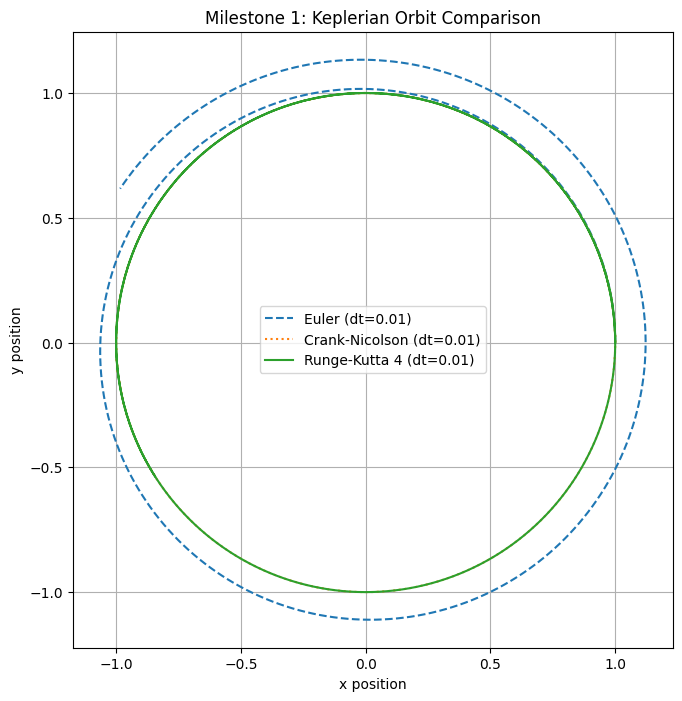

In [ ]:
# Plotting the orbits together
plt.figure(figsize=(8, 8))
plt.plot(state_euler[:, 0], state_euler[:, 1], label='Euler (dt=0.01)', linestyle='--')
plt.plot(state_cn[:, 0], state_cn[:, 1], label='Crank-Nicolson (dt=0.01)', linestyle=':')
plt.plot(state_rk4[:, 0], state_rk4[:, 1], label='Runge-Kutta 4 (dt=0.01)', linestyle='-')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Milestone 1: Keplerian Orbit Comparison')
plt.legend()
plt.grid(True)
plt.show()